In [1]:
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense

from keras.utils import to_categorical

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.
/Users/gianluca/python_venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/gianluca/python_venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/gianluca/python_venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/gianluca/python_venv/lib/python3.7

In [2]:
seed = 12345
num_samples = 1000  # num_samples_per_class
num_dims = 2  # dimensions
num_classes = 3  # num_classes
num_hidden = 100  # num_hidden_units

In [3]:
X = np.zeros((num_samples*num_classes, num_dims))
y = np.zeros(num_samples*num_classes)

for c in range(num_classes):
    
    index = 0
    
    t = np.linspace(0, 1, num_samples)
        
    inner_var = np.linspace(
        # When t = 0
        (2 * math.pi / num_classes) * (c),
        # When t = 1
        (2 * math.pi / num_classes) * (2 + c),
        num_samples
    ) #+ np.randn(num_samples) * 0
        
    for x in range(num_samples*c, num_samples*(c+1)):
                
        tmp = []
        tmp.append(t[index] * np.sin(inner_var[index]))
        tmp.append(t[index] * np.cos(inner_var[index]))
        
        X[x] = tmp
        y[x] = c
        
        index += 1

        
print(y)
y = to_categorical(y)
print(y)

[0. 0. 0. ... 2. 2. 2.]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [4]:
print(X)
print(X.shape)

[[ 0.00000000e+00  0.00000000e+00]
 [ 4.19716807e-06  1.00099220e-03]
 [ 1.67885247e-05  2.00193161e-03]
 ...
 [ 8.68445769e-01 -4.91733618e-01]
 [ 8.67245293e-01 -4.95867524e-01]
 [ 8.66025404e-01 -5.00000000e-01]]
(3000, 2)


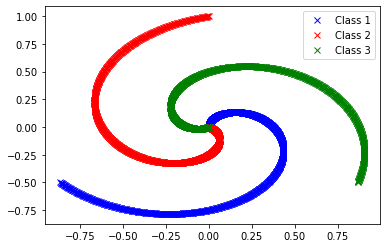

In [5]:
fig = plt.figure()

plt.plot(X[0:1000,0], X[0:1000,1], 'bx', label="Class 1")
plt.plot(X[1000:2000,0], X[1000:2000,1], 'rx', label="Class 2")
plt.plot(X[2000:,0], X[2000:,1], 'gx', label="Class 3")
plt.legend()
plt.show()

In [6]:
### Linear Model

model = Sequential()
model.add(Dense(10, activation='linear', input_dim=2))
model.add(Dense(3, activation='linear'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X, y, epochs=100)






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
3000/3000 [==============================] - 0s 68us/step - loss: 2.6560 - acc: 0.5297
Epoch 2/100
3000/3000 [==============================] - 0s 18us/step - loss: 2.4409 - acc: 0.5430
Epoch 3/100
3000/3000 [==============================] - 0s 18us/step - loss: 1.6552 - acc: 0.4810
Epoch 4/100
3000/3000 [==============================] - 0s 18us/step - loss: 1.4219 - acc: 0.4447
Epoch 5/100
3000/3000 [=======================

3000/3000 [==============================] - 0s 16us/step - loss: 2.9971 - acc: 0.1663
Epoch 62/100
3000/3000 [==============================] - 0s 16us/step - loss: 3.0912 - acc: 0.1497
Epoch 63/100
3000/3000 [==============================] - 0s 17us/step - loss: 3.1588 - acc: 0.1260
Epoch 64/100
3000/3000 [==============================] - 0s 16us/step - loss: 3.2635 - acc: 0.1257
Epoch 65/100
3000/3000 [==============================] - 0s 16us/step - loss: 3.3289 - acc: 0.1263
Epoch 66/100
3000/3000 [==============================] - 0s 17us/step - loss: 3.4402 - acc: 0.1293
Epoch 67/100
3000/3000 [==============================] - 0s 16us/step - loss: 3.5249 - acc: 0.1337
Epoch 68/100
3000/3000 [==============================] - 0s 15us/step - loss: 3.6407 - acc: 0.1427
Epoch 69/100
3000/3000 [==============================] - 0s 17us/step - loss: 3.6949 - acc: 0.1430
Epoch 70/100
3000/3000 [==============================] - 0s 16us/step - loss: 3.7408 - acc: 0.1430
Epoch 71/100


(200, 200)
(200, 200)
(40000,)
(2, 40000)


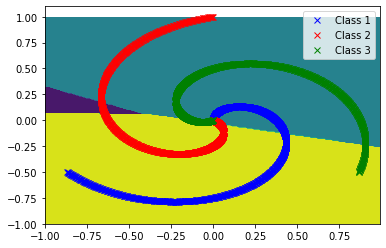

In [7]:
# Plot decision boundary

# Create 2D mesh and then get prediction mask. Then make contour plot.

x_mesh = np.arange(-1, 1, 0.01)
y_mesh = np.arange(-1, 1, 0.01)
xx, yy = np.meshgrid(x_mesh, y_mesh)

print(xx.shape)
print(yy.shape)

print(xx.ravel().shape)

X_mesh = np.vstack((xx.ravel(), yy.ravel()))
print(X_mesh.shape)

y_pred = model.predict(X_mesh.T)

y_pred = np.argmax(y_pred, axis=1)
y_pred = y_pred.reshape(200,200)

fig = plt.figure()
plt.plot(X[0:1000,0], X[0:1000,1], 'bx', label="Class 1")
plt.plot(X[1000:2000,0], X[1000:2000,1], 'rx', label="Class 2")
plt.plot(X[2000:,0], X[2000:,1], 'gx', label="Class 3")
plt.contourf(xx,yy,y_pred)
plt.legend()
plt.show()

In [8]:
### Two-layered network

model = Sequential()
model.add(Dense(100, activation='sigmoid', input_dim=2))
model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X, y, epochs=300)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 303       
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
3000/3000 [==============================] - 0s 73us/step - loss: 1.0929 - acc: 0.3960
Epoch 2/300
3000/3000 [==============================] - 0s 21us/step - loss: 1.0491 - acc: 0.5397
Epoch 3/300
3000/3000 [==============================] - 0s 20us/step - loss: 0.9831 - acc: 0.5330
Epoch 4/300
3000/3000 [==============================] - 0s 19us/step - loss: 0.9137 - acc: 0.5410
Epoch 5/300
3000/3000 [==============================] - 0s 20us/step - loss: 0.8576 - acc: 0.5163
Epoch 6/300
3000/3000 [======================

3000/3000 [==============================] - 0s 19us/step - loss: 0.7420 - acc: 0.5127
Epoch 78/300
3000/3000 [==============================] - 0s 18us/step - loss: 0.7389 - acc: 0.5147
Epoch 79/300
3000/3000 [==============================] - 0s 20us/step - loss: 0.7375 - acc: 0.5187
Epoch 80/300
3000/3000 [==============================] - 0s 20us/step - loss: 0.7374 - acc: 0.5220
Epoch 81/300
3000/3000 [==============================] - 0s 19us/step - loss: 0.7345 - acc: 0.5267
Epoch 82/300
3000/3000 [==============================] - 0s 19us/step - loss: 0.7341 - acc: 0.5203
Epoch 83/300
3000/3000 [==============================] - 0s 19us/step - loss: 0.7310 - acc: 0.5223
Epoch 84/300
3000/3000 [==============================] - 0s 19us/step - loss: 0.7300 - acc: 0.5353
Epoch 85/300
3000/3000 [==============================] - 0s 20us/step - loss: 0.7280 - acc: 0.5270
Epoch 86/300
3000/3000 [==============================] - 0s 20us/step - loss: 0.7250 - acc: 0.5240
Epoch 87/300


3000/3000 [==============================] - 0s 19us/step - loss: 0.2836 - acc: 0.9240
Epoch 159/300
3000/3000 [==============================] - 0s 19us/step - loss: 0.2779 - acc: 0.9220
Epoch 160/300
3000/3000 [==============================] - 0s 20us/step - loss: 0.2728 - acc: 0.9270
Epoch 161/300
3000/3000 [==============================] - 0s 19us/step - loss: 0.2681 - acc: 0.9270
Epoch 162/300
3000/3000 [==============================] - 0s 19us/step - loss: 0.2626 - acc: 0.9293
Epoch 163/300
3000/3000 [==============================] - 0s 19us/step - loss: 0.2574 - acc: 0.9287
Epoch 164/300
3000/3000 [==============================] - 0s 19us/step - loss: 0.2535 - acc: 0.9350
Epoch 165/300
3000/3000 [==============================] - 0s 19us/step - loss: 0.2479 - acc: 0.9363
Epoch 166/300
3000/3000 [==============================] - 0s 19us/step - loss: 0.2434 - acc: 0.9367
Epoch 167/300
3000/3000 [==============================] - 0s 19us/step - loss: 0.2386 - acc: 0.9347
Epoc

3000/3000 [==============================] - 0s 19us/step - loss: 0.0777 - acc: 0.9877
Epoch 240/300
3000/3000 [==============================] - 0s 19us/step - loss: 0.0768 - acc: 0.9870
Epoch 241/300
3000/3000 [==============================] - 0s 20us/step - loss: 0.0749 - acc: 0.9927
Epoch 242/300
3000/3000 [==============================] - 0s 19us/step - loss: 0.0745 - acc: 0.9883
Epoch 243/300
3000/3000 [==============================] - 0s 20us/step - loss: 0.0731 - acc: 0.9903
Epoch 244/300
3000/3000 [==============================] - 0s 19us/step - loss: 0.0730 - acc: 0.9893
Epoch 245/300
3000/3000 [==============================] - 0s 19us/step - loss: 0.0717 - acc: 0.9923
Epoch 246/300
3000/3000 [==============================] - 0s 19us/step - loss: 0.0711 - acc: 0.9917
Epoch 247/300
3000/3000 [==============================] - 0s 19us/step - loss: 0.0703 - acc: 0.9930
Epoch 248/300
3000/3000 [==============================] - 0s 19us/step - loss: 0.0692 - acc: 0.9923
Epoc

(200, 200)
(200, 200)
(40000,)
(2, 40000)


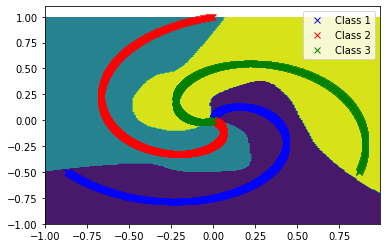

In [9]:
# Plot decision boundary

# Create 2D mesh and then get prediction mask. Then make contour plot.

x_mesh = np.arange(-1, 1, 0.01)
y_mesh = np.arange(-1, 1, 0.01)
xx, yy = np.meshgrid(x_mesh, y_mesh)

print(xx.shape)
print(yy.shape)

print(xx.ravel().shape)

X_mesh = np.vstack((xx.ravel(), yy.ravel()))
print(X_mesh.shape)

y_pred = model.predict(X_mesh.T)

y_pred = np.argmax(y_pred, axis=1)
y_pred = y_pred.reshape(200,200)

fig = plt.figure()
plt.plot(X[0:1000,0], X[0:1000,1], 'bx', label="Class 1")
plt.plot(X[1000:2000,0], X[1000:2000,1], 'rx', label="Class 2")
plt.plot(X[2000:,0], X[2000:,1], 'gx', label="Class 3")
plt.contourf(xx,yy,y_pred)
plt.legend()